# Topics to cover

## [0. Install](#0)


## [1. Color theories](#1)
         - Number of colors Human eye can see
         - Cone L, M, S cells
         - Trichromatic theory
         


## [2. Color spaces](#2)
        - Grayscale
        - RGB
        - CMYK


## [3. Additive and subtractive color theory](#3)
        - Additive
        - Subtractive
    


## [4. Other color spaces](#4)
        - CIE - LAB -> Close to our eye color space
        - CIE - XYZ
        - CIE - YCrCb
        - HSV
        - HLS 

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [ ]:
# Select the requirements file as per OS and CUDA version or CPU version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

In [2]:
# Imports
import os
import sys
sys.path.append("monk_v1/monk/");

In [3]:
%matplotlib inline

<a id='1'></a>
# Color Theories

In [4]:
print("Use slider to change slides")
# Slide section 1
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=1, min=1, max=8);

def f(slide_num):
    img_name = "imgs/chapter2/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=1, description='slide_num', max=8, min=1), Output()), _dom_classes=('wid…

In [5]:
# Visual Exercise

# Staring at the white and red image for 30 to 60 seconds caused the white and red opponent cells to 
# become fatigued. When you shift your focus to a blank surface, those cells are no longer able to fire, 
# so only the opposing black and green cells continue to fire in response to visual stimuli. 
# As a result, you will see a brief afterimage that is black and green instead of white and red.

# While looking into the first screen, the red cells got fatugued. And the inhibitory green 
# cells started firing instead of the red. Till the red cells recover the green will be active. Green being 
# the next most responsive to higher wavelengths


import cv2
import numpy as np
from matplotlib import pyplot as plt

sl = widgets.IntSlider(value=1, min=1, max=2);

def f(num):
    if(num==1):
        img = np.zeros((800, 800, 3), dtype=np.uint8);
        img[:,:,0] = 255;
        img[300:500, 300:500, :] = 255; 
    
        plt.figure(figsize=(15,15))
        plt.imshow(img);
        plt.show();
    elif(num==2):
        img = np.zeros((800, 800, 3), dtype=np.uint8);
        img[:,:,:] = 255;
    
        plt.figure(figsize=(15,15))
        plt.imshow(img);
        plt.show();

interact(f, num=sl);

interactive(children=(IntSlider(value=1, description='num', max=2, min=1), Output()), _dom_classes=('widget-in…

### Quiz -1
1. What color does the L cone absorb?

<a id='2'></a>
# Color spaces
    - Grayscale
    - RGB
    - CMYK

### Grayscale images

In [25]:
print("Use slider to change slides")
# Slide section 2

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=9, min=9, max=9);

def f(slide_num):
    img_name = "imgs/chapter2/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=9, description='slide_num', max=9, min=9), Output()), _dom_classes=('wid…

In [ ]:
# What was the second parameter value toload a gray image in opencv cv2.imread

In [9]:
# Accessing grayscale pixels using opencv
# Explain how numbering starts
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/outdoor.jpg", 0); # Read image as grayscale

# Shape function
print("Input image shape - {}".format(img.shape));
# Single channeled image with just two dimensions

Input image shape - (360, 640)


Value at row-100 and col-100 = 62


<IPython.core.display.Javascript object>


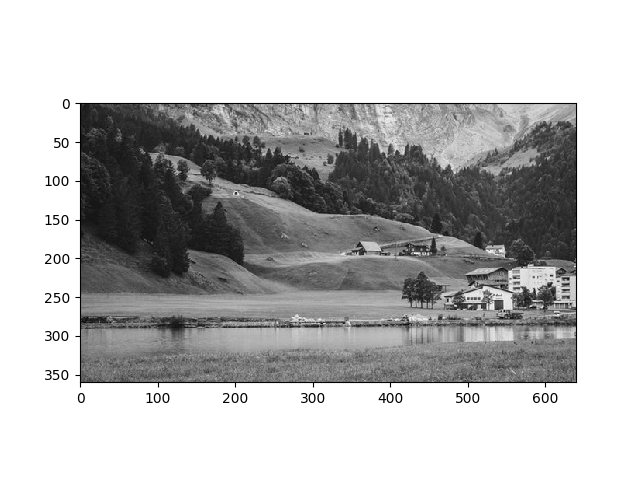

In [10]:
# Value at row = 100;
# Value at col = 100;
# Zoom in and check

#first rwo number, then column number
value = img[100, 100];


print("Value at row-{} and col-{} = {}".format(100, 100, value));

plt.imshow(img, cmap = "gray");
plt.show();

Original Value at row-100 and col-100 = 62
Final Value at row-100 and col-100 = 255


<IPython.core.display.Javascript object>


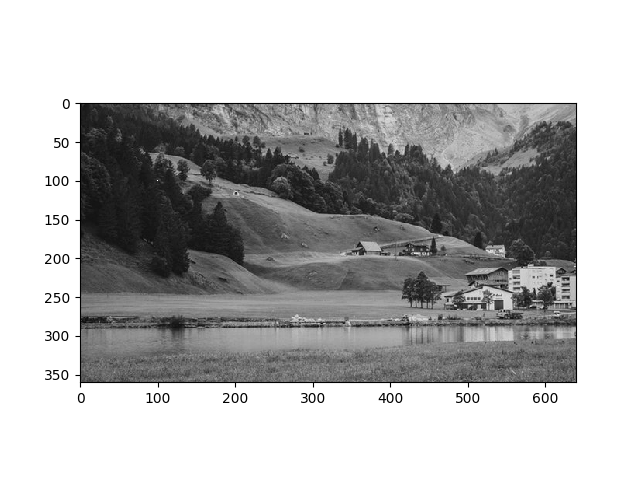

In [13]:
# Changing pixel value using opencv
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/outdoor.jpg", 0); # Read image as grayscale

row = 100;
col = 100;

print("Original Value at row-{} and col-{} = {}".format(row, col, img[row, col]));

# reverse assignment
img[row, col] = 255;
print("Final Value at row-{} and col-{} = {}".format(row, col, img[row, col]));


plt.imshow(img, cmap = "gray");
plt.show();

In [ ]:
# How to do the same thing using PIL?

In [14]:
# Accessing pixel value using pillow
%matplotlib notebook
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
img_p = Image.open("imgs/chapter2/tessellate.jpg"); # Pillow always reads an image as colored

#.convert function. With a value given as "L"
img_p = img_p.convert("L");

In [15]:
# Image.getpixel()

row = 100;
col = 100;

value = img_p.getpixel((row, col))

print("Pixel Value at row-{} and col-{} = {}".format(row, col, value));

Pixel Value at row-100 and col-100 = 120


<IPython.core.display.Javascript object>


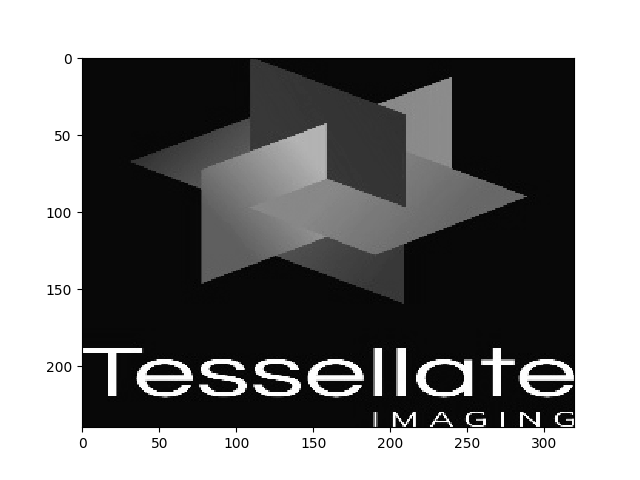

In [16]:

plt.imshow(img_p, cmap = "gray");
plt.show();

In [17]:
# Changing pixel value using pillow
%matplotlib notebook
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
img_p = Image.open("imgs/chapter2/tessellate.jpg"); # Reads image as RGB
img_p = img_p.convert("L");

In [18]:
# Image.putpixel

row = 100;
col = 100;

print("Original Value at row-{} and col-{} = {}".format(row, col, img_p.getpixel((row, col))));

img_p.putpixel((row, col), 255);


print("Final Value at row-{} and col-{} = {}".format(row, col, img_p.getpixel((row, col))));

Original Value at row-100 and col-100 = 120
Final Value at row-100 and col-100 = 255


<IPython.core.display.Javascript object>


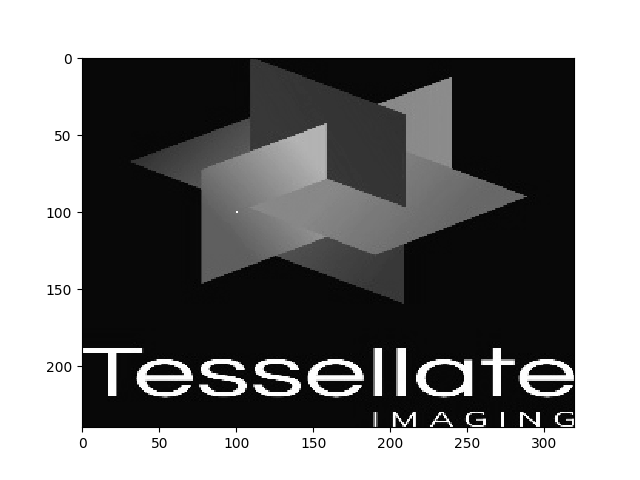

In [19]:
plt.imshow(img_p, cmap = "gray");
plt.show();

### RGB Color Space

In [6]:
print("Use slider to change slides")
# Slide section 3

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=10, min=10, max=10);

def f(slide_num):
    img_name = "imgs/chapter2/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=10, description='slide_num', max=10, min=10), Output()), _dom_classes=('…

In [21]:
# Accessing channels of RGB image using opencv
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/outdoor.jpg", 1);

In [22]:
#cv2.split
b, g, r = cv2.split(img);

### Quiz - 2
 - Use the .shape function to print the shape of original image and the three components

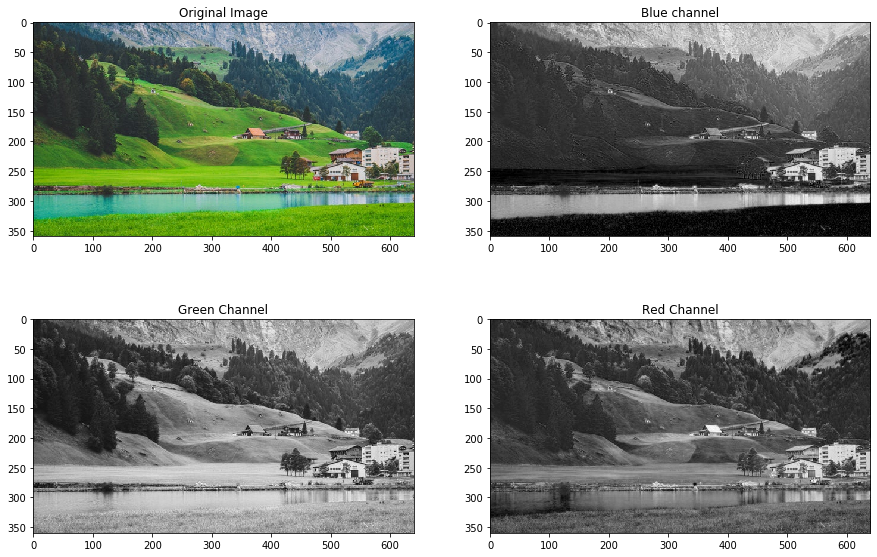

In [23]:
f = plt.figure(figsize=(15,10))
f.add_subplot(2, 2, 1).set_title('Original Image');
plt.imshow(img[:,:,::-1])
f.add_subplot(2, 2, 2).set_title('Blue channel');
plt.imshow(b, cmap = "gray");
f.add_subplot(2, 2, 3).set_title('Green Channel');
plt.imshow(g, cmap = "gray");
f.add_subplot(2, 2, 4).set_title('Red Channel');
plt.imshow(r, cmap = "gray");
plt.show()

### Quiz - 3
 - Why are the red, green and blue channels not red, green and blue colored?

In [7]:
# Interactive Demo - 1.
# Visualizing r, g, b channels

%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import matplotlib.pyplot as plt


sl = widgets.SelectionSlider(options=["blue", "green", "red", "rgb"], value="rgb");

def f(channel):
    img = cv2.imread("imgs/chapter2/outdoor.jpg", -1);
    
    
    
    
    #######################FOCUS####################################
    if(channel == "blue"):
        img[:,:,1] = 0;
        img[:,:,2] = 0;
    elif(channel == "green"):
        img[:,:,0] = 0;
        img[:,:,2] = 0;
    elif(channel == "red"):
        img[:,:,0] = 0;
        img[:,:,1] = 0;
    ################################################################    
        
        
        
        
        
        
    plt.figure(figsize=(8, 8))
    plt.imshow(img[:,:,::-1])
    plt.show()

interact(f, channel=sl);

interactive(children=(SelectionSlider(description='channel', index=3, options=('blue', 'green', 'red', 'rgb'),…

In [25]:
# Accessing channels in RGB image using pillow
%matplotlib inline
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
img_p = Image.open("imgs/chapter2/outdoor.jpg");

In [26]:
r, g, b = img_p.split();

### Quiz - 4
 - What difference do you notice between OpenCV's split and PIL's split functions?

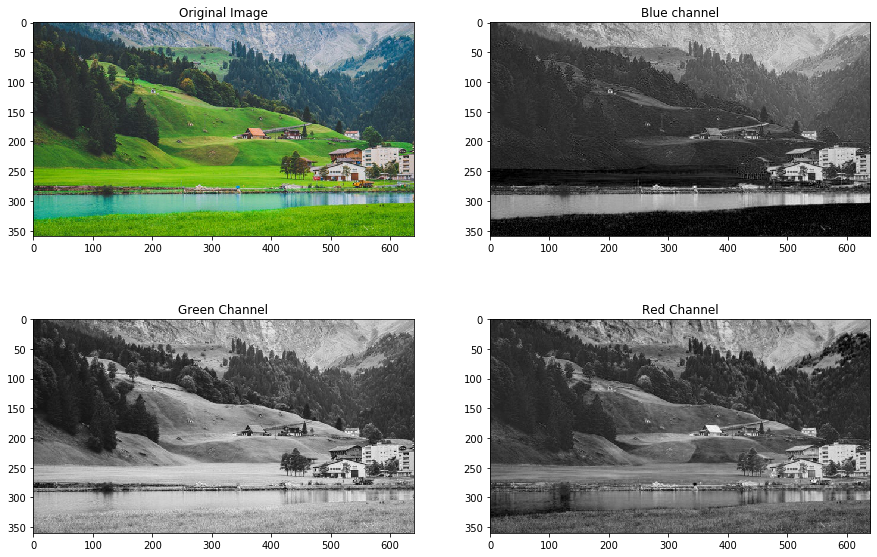

In [27]:
f = plt.figure(figsize=(15,10))
f.add_subplot(2, 2, 1).set_title('Original Image');
plt.imshow(img_p)
f.add_subplot(2, 2, 2).set_title('Blue channel');
plt.imshow(b, cmap = "gray");
f.add_subplot(2, 2, 3).set_title('Green Channel');
plt.imshow(g, cmap = "gray");
f.add_subplot(2, 2, 4).set_title('Red Channel');
plt.imshow(r, cmap = "gray");
plt.show();

In [ ]:
# Accessing RGB pixels using opencv
# Explain how numbering starts
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/outdoor.jpg", -1); # Read image as grayscale

# Shape function
print("Input image shape - {}".format(img.shape));

# Value at row = 150;
# Value at col = 100;
# Zoom in and check

# What should be the index values?
value = img[, ]


print("Value at row-{} and col-{} = {}".format(100, 100, ));

plt.imshow(img[:, :, ::-1]);
plt.show();

Original Value at row-100 and col-100 = [50 68 55]
Final Value at row-100 and col-100 = [255 255 255]


<IPython.core.display.Javascript object>


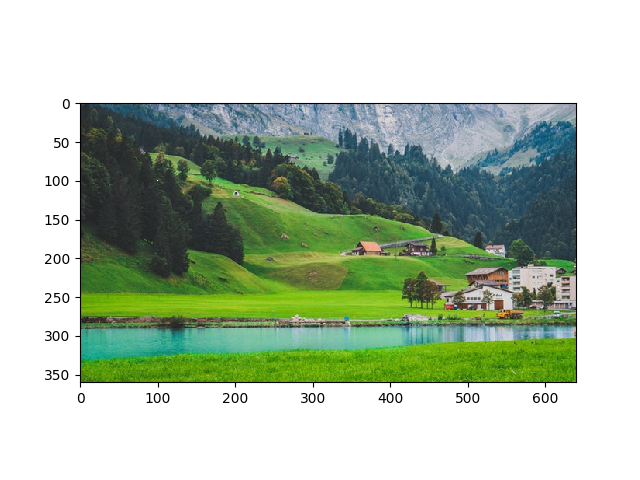

In [1]:
# Changing RGB image pixel value using opencv
%matplotlib notebook
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/outdoor.jpg", -1); # Read image as grayscale

row = 100;
col = 100;

print("Original Value at row-{} and col-{} = {}".format(row, col, img[row, col]));

img[row][col] = [255, 255, 255];


print("Final Value at row-{} and col-{} = {}".format(row, col, img[row, col]));


plt.imshow(img[:, :, ::-1]);
plt.show();

### Quiz - 5
 - Instead of making the previous pixel white, make it first blue, then green and then red.

Pixel Value at row-100 and col-100 = (231, 78, 47)


<IPython.core.display.Javascript object>


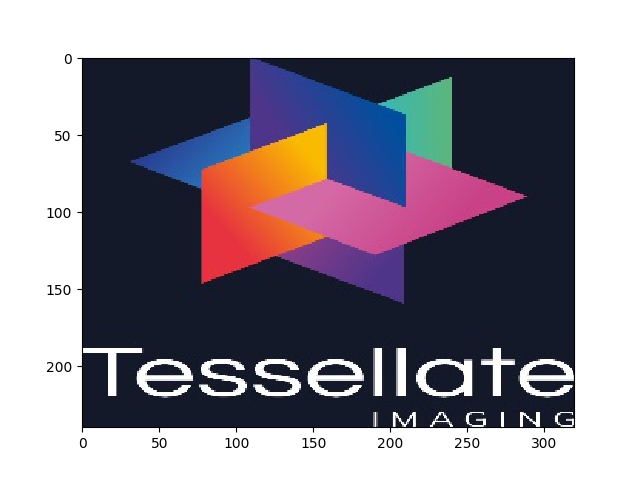

In [3]:
# Accessing RGB image pixel value using pillow
%matplotlib notebook
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
img_p = Image.open("imgs/chapter2/tessellate.jpg"); # Reads image as RGB

row = 100;
col = 100;

print("Pixel Value at row-{} and col-{} = {}".format(row, col, img_p.getpixel((row, col))));

plt.imshow(img_p);
plt.show();

Original Value at row-100 and col-100 = (231, 78, 47)
Final Value at row-100 and col-100 = (255, 255, 255)


<IPython.core.display.Javascript object>


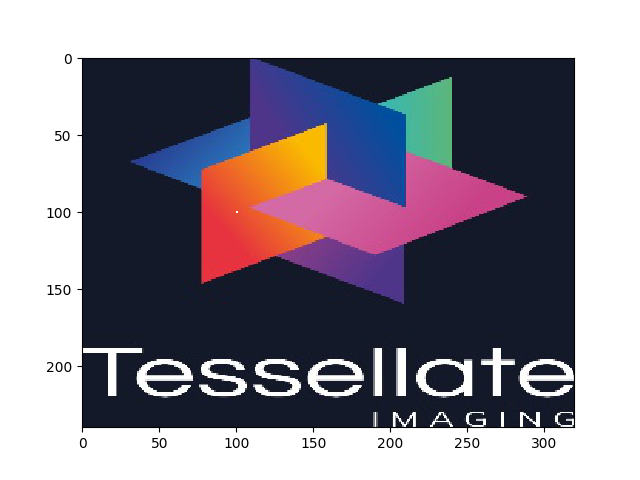

In [4]:
# Changing pixel value using pillow
%matplotlib notebook
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
img_p = Image.open("imgs/chapter2/tessellate.jpg"); # Reads image as RGB

row = 100;
col = 100;

print("Original Value at row-{} and col-{} = {}".format(row, col, img_p.getpixel((row, col))));
img_p.putpixel((row, col), (255, 255, 255));
print("Final Value at row-{} and col-{} = {}".format(row, col, img_p.getpixel((row, col))));



plt.imshow(img_p);
plt.show();

In [ ]:
# We did talk about grayscale images being used where color components add no advantage
# How to convert a RGB image to grayscale

## DIY CODING

In [ ]:
# Converting RGB to Grayscale in opencv
#link: https://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Read image named "imgs/chapter2/outdoor.jpg" as color image
img = ;

In [ ]:
#cv2.cvtColor
img_out = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
f = plt.figure(figsize=(15,8))
f.add_subplot(1, 2, 1).set_title('RGB Image');
plt.imshow(img[:, :, ::-1])
f.add_subplot(1, 2, 2).set_title('Grayscale Image');
plt.imshow(img_out, cmap = "gray");
plt.show();

In [ ]:
# Formula: Y = 0.299*R + 0.587*G + 0.114*B

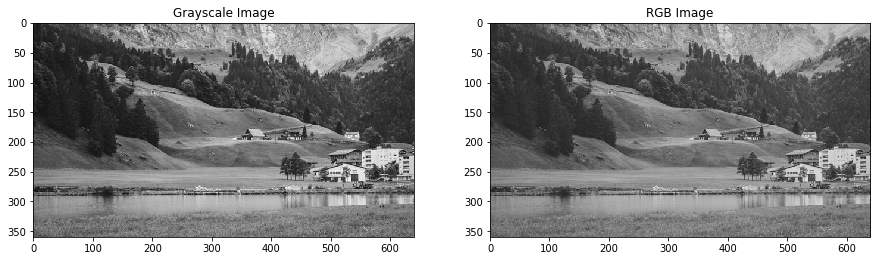

In [6]:
# Converting Grayscale to RGB in opencv

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/outdoor.jpg", 0);


################################FOCUS##################
img_out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
#######################################################



f = plt.figure(figsize=(15,8))
f.add_subplot(1, 2, 1).set_title('Grayscale Image');
plt.imshow(img, cmap = "gray")
f.add_subplot(1, 2, 2).set_title('RGB Image');
plt.imshow(img_out[:, :, ::-1]);
plt.show();

# Should have been the an RGB output right? Then what went wrong?

### Quiz - 6
 - Why cannot a grayscale image be converted to an RGB image using simple image processing?

## DIY CODING

In [ ]:
# Conerting RGB to Grayscale in pillow
# The algorithm to convert RGB to gray?


%matplotlib inline
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Read an image named "imgs/chapter2/outdoor.jpg" using PIL
img = 

In [ ]:
img_out = img.convert("L")

In [ ]:
f = plt.figure(figsize=(15,8))
f.add_subplot(1, 2, 1).set_title('RGB Image');
plt.imshow(img)
f.add_subplot(1, 2, 2).set_title('Grayscale Image');
plt.imshow(img_out, cmap = "gray");
plt.show();

<a id='3'></a>
# Additive and subtractive color theory

In [28]:
print("Use slider to change slides")
# Slide section 4

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=11, min=11, max=11);

def f(slide_num):
    img_name = "imgs/chapter2/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=11, description='slide_num', max=11, min=11), Output()), _dom_classes=('…

## Additive color theory

In [10]:
# Interactive Demo - 2.
# Additive color theory

%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import numpy as np
import matplotlib.pyplot as plt


sl = widgets.SelectionSlider(options=["black", "blue", "green", "red"], value="black");

def f(channel):
    if(channel == "black"):
        img_out = np.zeros((400, 400, 3), dtype=np.uint8);
    if(channel == "blue"):
        img_out = np.zeros((400, 400, 3), dtype=np.uint8);
        cv2.circle(img_out,(150, 150), 90, (255,0,0), -1);
    elif(channel == "green"):
        img1 = np.zeros((400, 400, 3), dtype=np.uint8);
        cv2.circle(img1,(150, 150), 90, (255,0,0), -1);
        img2 = np.zeros((400, 400, 3), dtype=np.uint8);
        cv2.circle(img2,(250, 150), 90, (0,255,0), -1);
        img_out = cv2.add(img1, img2);
    elif(channel == "red"):
        img1 = np.zeros((400, 400, 3), dtype=np.uint8);
        cv2.circle(img1,(150, 150), 90, (255,0,0), -1);
        img2 = np.zeros((400, 400, 3), dtype=np.uint8);
        cv2.circle(img2,(250, 150), 90, (0,255,0), -1);
        img_out = cv2.add(img1, img2);
        img3 = np.zeros((400, 400, 3), dtype=np.uint8);
        cv2.circle(img3,(200, 200), 90, (0,0,255), -1);
        img_out = cv2.add(img_out, img3);
        
    plt.figure(figsize=(12, 12))
    plt.imshow(img_out[:,:,::-1])
    plt.show()

interact(f, channel=sl);

interactive(children=(SelectionSlider(description='channel', options=('black', 'blue', 'green', 'red'), value=…

### Subtractive color theory

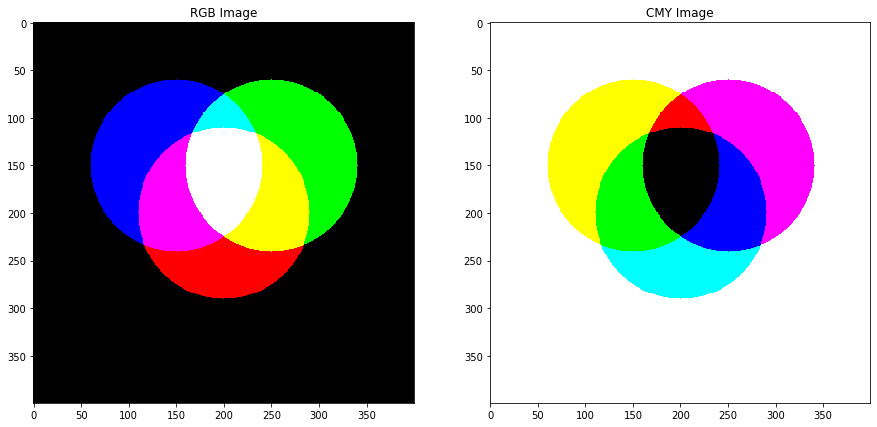

In [9]:
# CMYK color space from rgb using numpy and opencv

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img1 = np.zeros((400, 400, 3), dtype=np.uint8);
cv2.circle(img1,(150, 150), 90, (255,0,0), -1);
img2 = np.zeros((400, 400, 3), dtype=np.uint8);
cv2.circle(img2,(250, 150), 90, (0,255,0), -1);
img = cv2.add(img1, img2);
img3 = np.zeros((400, 400, 3), dtype=np.uint8);
cv2.circle(img3,(200, 200), 90, (0,0,255), -1);
img = cv2.add(img, img3);
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB); # another conversion function


rgb_scale = 255
cmyk_scale = 255


def rgb_to_cmyk(r,g,b):
    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / 255.
    m = 1 - g / 255.
    y = 1 - b / 255.

    # extract out k [0,1]
    min_cmy = np.min([c, m, y])
    c = (c - min_cmy) / (1 - min_cmy)
    m = (m - min_cmy) / (1 - min_cmy)
    y = (y - min_cmy) / (1 - min_cmy)
    k = min_cmy

    # rescale to the range [0,cmyk_scale]
    return (c*cmyk_scale).astype(np.uint8), (m*cmyk_scale).astype(np.uint8), (y*cmyk_scale).astype(np.uint8), k*cmyk_scale

r, g, b = cv2.split(img);
c, m, y, k = rgb_to_cmyk(r,g,b)

cmyk = cv2.merge((c, m, y))

f = plt.figure(figsize=(15,8))
f.add_subplot(1, 2, 1).set_title('RGB Image');
plt.imshow(img)
f.add_subplot(1, 2, 2).set_title('CMY Image');
plt.imshow(cmyk);
plt.show();

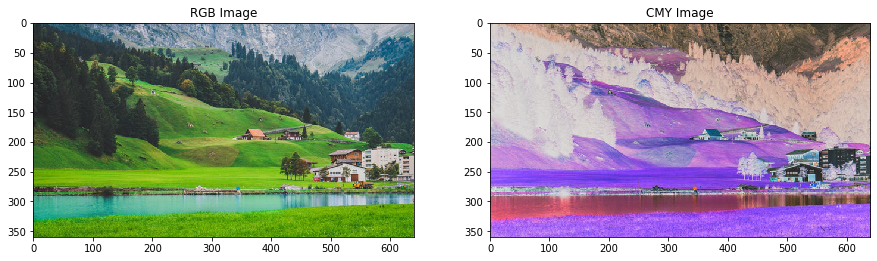

In [10]:
%matplotlib inline
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
img = Image.open("imgs/chapter2/outdoor.jpg");
cmyk = img.convert('CMYK');
# CMYK images cannot be displayed in jupyter notebook

c, m, y, k  = cmyk.split()

cmy = Image.merge("RGB", (c, m, y))
f = plt.figure(figsize=(15,8))
f.add_subplot(1, 2, 1).set_title('RGB Image');
plt.imshow(img);
f.add_subplot(1, 2, 2).set_title('CMY Image');
plt.imshow(cmy);
plt.show();

# QUIZ
 - RGB color space is integer based.
 - Every pixel has 0-255 red, 0-255 blue aand 0-255 gree values.
 - How many different color combinations can be created for a single pixel?

<a id='4'></a>
# Other color spaces:
    - CIE - LAB -> Close to our eye color space
    - CIE - XYZ
    - CIE - YCrCb
    - HSV

#Links: https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/
#Links: https://scikit-image.org/docs/dev/api/skimage.color.html

## CIE - LAB Color Space

In [29]:
print("Use slider to change slides")
#Link: https://www.xrite.com/blog/lab-color-space
# Slide section 5

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=12, min=12, max=12);

def f(slide_num):
    img_name = "imgs/chapter2/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=12, description='slide_num', max=12, min=12), Output()), _dom_classes=('…

## DIY CODING

In [ ]:
# RGB <--> LAB using opencv
# Link: https://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read an image named "imgs/chapter2/cube.png" as BGR image
img = 

In [ ]:
# cv2.cvtColor
# 

# Use right function of color conversion and use flag cv2.COLOR_BGR2LAB instead of cv2.COLOR_BGR2GRAY
img_out = 

In [ ]:
f = plt.figure(figsize=(15,8))
f.add_subplot(1, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(1, 2, 2).set_title('LAB');
plt.imshow(img_out);
plt.show();

### Quiz - 7
 - What was the cv2.cvtColor flag to convert RGB to grayscale image?

In [ ]:
# The above representation makes no sense

l, a, b = cv2.split(img_out);

f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('L');
plt.imshow(l, cmap="gray");
f.add_subplot(2, 2, 3).set_title('A');
plt.imshow(a, cmap="gray");
f.add_subplot(2, 2, 4).set_title('B');
plt.imshow(b, cmap="gray");
plt.show();


## DIY CODING

In [ ]:
# Value at certain Pixel

# Write code to get values of pixel at row = 200, column = 200
values = img_out[ , ]

print(values)

In [ ]:
print("L Value = ", values[]);
print("A Value = ", values[]);
print("B Value = ", values[]);

# Expected degree values in float and L to range from 0-100. But what went wrong?
# Pixel values are quantized as per 8-bit values 

## DIY CODING

In [ ]:
# RGB <--> LAB using Pillow

%matplotlib inline
import numpy as np
from PIL import Image, ImageCms
from matplotlib import pyplot as plt

# Open image named "imgs/chapter2/cube.png" using Pillow 
img = ;


# Use right function t convert it to RGB space. Use function value as "RGB" instead of "L"
img = 

In [ ]:
# Convert to Lab colourspace
srgb_p = ImageCms.createProfile("sRGB")
lab_p  = ImageCms.createProfile("LAB")

rgb2lab = ImageCms.buildTransformFromOpenProfiles(srgb_p, lab_p, "RGB", "LAB")
Lab = ImageCms.applyTransform(img, rgb2lab)
l, a, b = Lab.split();

In [ ]:
f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('RGB Image');
plt.imshow(img);
f.add_subplot(2, 2, 2).set_title('L');
plt.imshow(l, cmap="gray");
f.add_subplot(2, 2, 3).set_title('A');
plt.imshow(a, cmap="gray");
f.add_subplot(2, 2, 4).set_title('B');
plt.imshow(b, cmap="gray");
plt.show();

In [12]:
# RGB <--> LAB using skimage

%matplotlib inline
import numpy as np
import cv2
import skimage
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/cube.png", 1);

## DIY CODING

In [ ]:
# skimage.color.rgb2lab

lab = skimage.color.rgb2lab(img); 

# Write an OpenCV function to split the channels of image stored in variable lab.
l, a, b = ;

In [ ]:
f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('L');
plt.imshow(l, cmap="gray");
f.add_subplot(2, 2, 3).set_title('A');
plt.imshow(a, cmap="gray");
f.add_subplot(2, 2, 4).set_title('B');
plt.imshow(b, cmap="gray");
plt.show();

### Quiz - 7
 - What was the cv2.cvtColor flag to convert RGB to grayscale image?

### Quiz - 8
 - What is the difference between luminance and illuminance?

## CIE - YCrCb 

In [30]:
print("Use slider to change slides")
# Link Visualize YCrCb: https://en.wikipedia.org/wiki/YCbCr#/media/File:YCbCr.GIF
# Slide section 6

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=13, min=13, max=13);

def f(slide_num):
    img_name = "imgs/chapter2/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=13, description='slide_num', max=13, min=13), Output()), _dom_classes=('…

## DIY CODING

In [ ]:
# RGB <--> YCrCb using opencv

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read image named "imgs/chapter2/cube.png" as BGR in OpenCV
img = 

In [ ]:
# cv2.COLOR_BGR2YCrCb

# Use right conversion function to convert image to YCrCb. Use flag cv2.COLOR_BGR2YCrCb
img_out = 

### Quiz - 9
 - What will be the output of cv2.split on the img_out?

In [ ]:
f = plt.figure(figsize=(15,8))
f.add_subplot(1, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(1, 2, 2).set_title('YCrCb');
plt.imshow(img_out);
plt.show();

In [ ]:
# The above representation makes no sense

Y, Cr, Cb = cv2.split(img_out);

f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('Y');
plt.imshow(Y, cmap="gray");
f.add_subplot(2, 2, 3).set_title('Cr');
plt.imshow(Cr, cmap="gray");
f.add_subplot(2, 2, 4).set_title('Cb');
plt.imshow(Cb, cmap="gray");
plt.show();

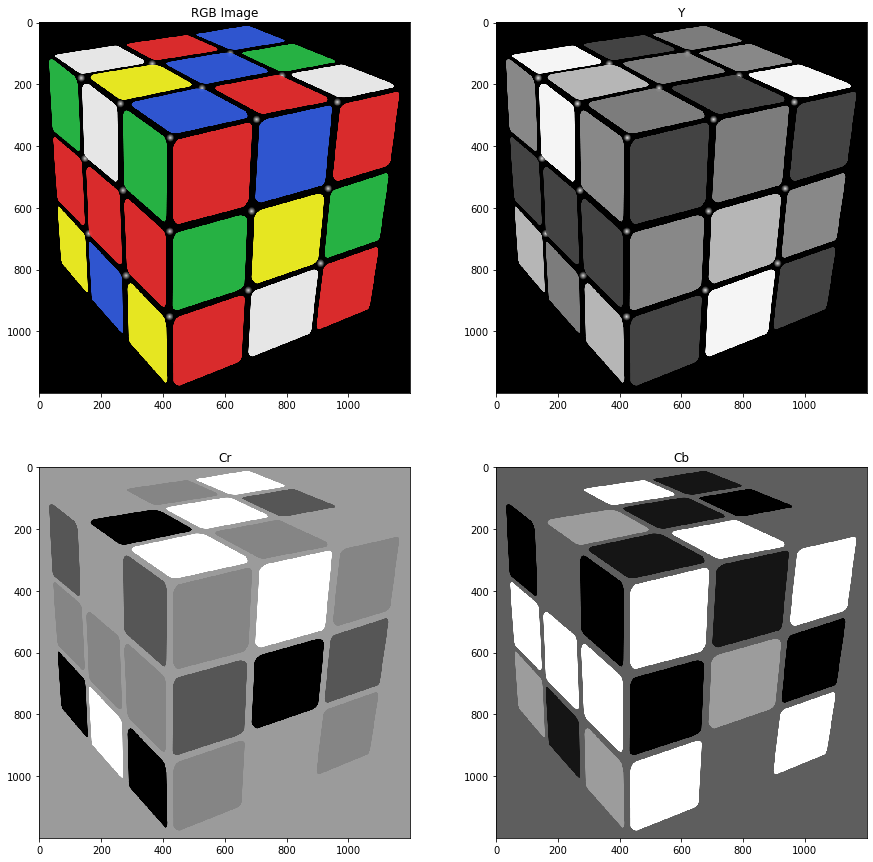

In [15]:
# RGB <--> LAB using skimage

%matplotlib inline
import numpy as np
import cv2
import skimage
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/cube.png", 1);


########################FOCUS####################
img_out = skimage.color.rgb2ycbcr(img); #skimage can work on numpy arrays hence opencv images
##################################################



Y, Cb, Cr = cv2.split(img_out); # first Cb then Cr

f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('Y');
plt.imshow(Y, cmap="gray");
f.add_subplot(2, 2, 3).set_title('Cr');
plt.imshow(Cr, cmap="gray");
f.add_subplot(2, 2, 4).set_title('Cb');
plt.imshow(Cb, cmap="gray");
plt.show();

## CIE - XYZ 

In [31]:
print("Use slider to change slides")
# Slide section 6

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=14, min=14, max=14);

def f(slide_num):
    img_name = "imgs/chapter2/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=14, description='slide_num', max=14, min=14), Output()), _dom_classes=('…

In [17]:
# RGB <--> XYZ using opencv

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/cube.png", 1);

In [18]:
#cv2.cvtColor
#cv2.COLOR_BGR2XYZ
img_out = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ);

### Quiz - 9
 - What is the flag value of cv2.cvtColor function for converting RGB to LAB?

In [ ]:
f = plt.figure(figsize=(15,8))
f.add_subplot(1, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(1, 2, 2).set_title('XYZ');
plt.imshow(img_out);
plt.show();

In [ ]:
# The above representation makes no sense

X, Y, Z = cv2.split(img_out);

f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('X');
plt.imshow(X, cmap="gray");
f.add_subplot(2, 2, 3).set_title('Y');
plt.imshow(Y, cmap="gray");
f.add_subplot(2, 2, 4).set_title('Z');
plt.imshow(Z, cmap="gray");
plt.show();

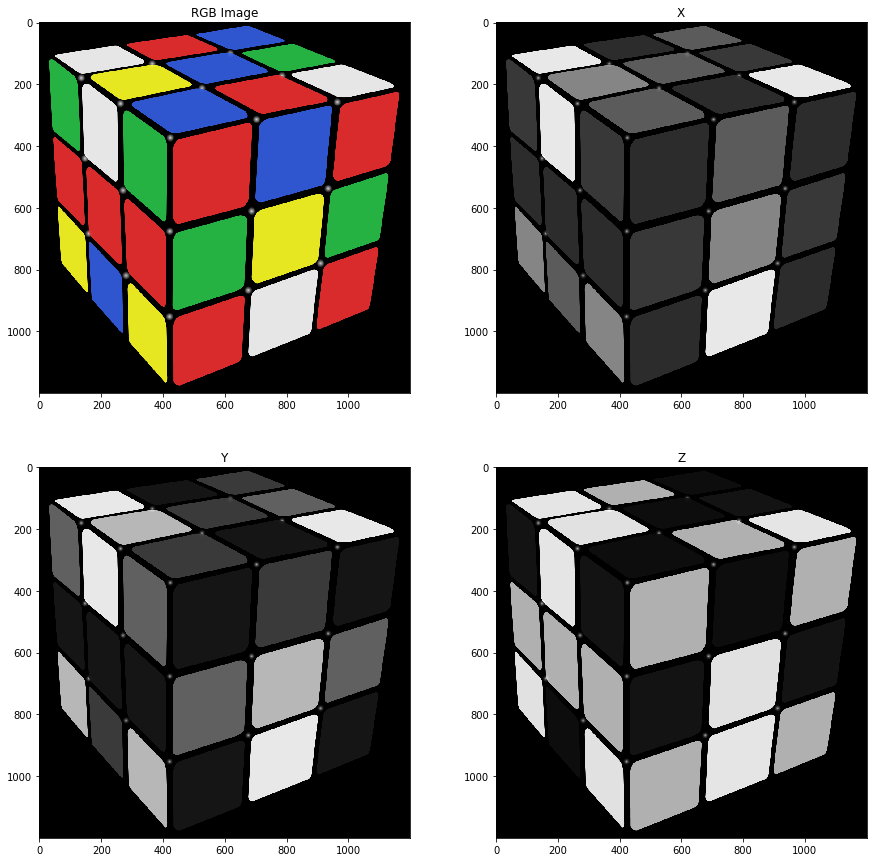

In [19]:
# RGB <--> XYZ using skimage

%matplotlib inline
import numpy as np
import cv2
import skimage
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter2/cube.png", 1);

####################FOCUS######################
img_out = skimage.color.rgb2xyz(img); #skimage can work on numpy arrays hence opencv images
###############################################


X, Y, Z = cv2.split(img_out);

f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('X');
plt.imshow(X, cmap="gray");
f.add_subplot(2, 2, 3).set_title('Y');
plt.imshow(Y, cmap="gray");
f.add_subplot(2, 2, 4).set_title('Z');
plt.imshow(Z, cmap="gray");
plt.show();

In [ ]:
# Another derived color space is HSV space

## HSV

In [32]:
print("Use slider to change slides")
# Slide section 7

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=15, min=15, max=15);

def f(slide_num):
    img_name = "imgs/chapter2/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=15, description='slide_num', max=15, min=15), Output()), _dom_classes=('…

In [ ]:
# RGB <--> HSV using OpenCV

%matplotlib inline
import numpy as np
import cv2
import skimage
from matplotlib import pyplot as plt

# Write a function to read "imgs/chapter2/cube.png" using OpenCV. read it as BGR
img = 

In [ ]:
# Convert it to HSV color space
img_out = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

In [ ]:
f = plt.figure(figsize=(15,8))
f.add_subplot(1, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(1, 2, 2).set_title('HSV');
plt.imshow(img_out);
plt.show();

In [ ]:
# The above representation does not give a clear picture of each channel

# Split the image into its three components
H, S, V = 


f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('H');
plt.imshow(H, cmap="gray");
f.add_subplot(2, 2, 3).set_title('S');
plt.imshow(S, cmap="gray");
f.add_subplot(2, 2, 4).set_title('V');
plt.imshow(V, cmap="gray");
plt.show();

In [ ]:
# RGB <--> HSV using skimage

%matplotlib inline
import numpy as np
import cv2
import skimage
from matplotlib import pyplot as plt
img = cv2.imread("cube.png", 1);


####################################FOCUS######################
img_out = skimage.color.rgb2hsv(img); #skimage can work on numpy arrays hence opencv images
###############################################################


H, S, V = cv2.split(img_out);

f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('RGB Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('H');
plt.imshow(H, cmap="gray");
f.add_subplot(2, 2, 3).set_title('S');
plt.imshow(S, cmap="gray");
f.add_subplot(2, 2, 4).set_title('V');
plt.imshow(V, cmap="gray");
plt.show();

# Other Color Spaces

In [33]:
print("Use slider to change slides")
# link: https://scikit-image.org/docs/dev/api/skimage.color.html

# Slide section 8

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=16, min=16, max=16);

def f(slide_num):
    img_name = "imgs/chapter2/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=16, description='slide_num', max=16, min=16), Output()), _dom_classes=('…

In [ ]:
# Next - Approach to image processing